In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os
import warnings
import processing_module as pm
import scipy.stats as stats
from tqdm import tqdm

warnings.filterwarnings("ignore")

In [3]:
def load_graph_pr(blocks: int, folder_name: str, gen_name: str) -> list:
    """
    Загрузка цепочек данных по пейджрангам по определённым блокам.
    """
    for t in range(0, blocks):
        my_path = os.path.abspath("") + "/.."
        CA_graph_df = pd.read_csv(my_path + "/Data_postproc/" + folder_name + "/Graph" + gen_name \
                                                   + str(t) + "_part.csv")
        G_init = nx.from_pandas_edgelist(CA_graph_df)
        pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]
    return pr


# def load_graph(blocks: int, folder_name: str, gen_name: str) -> nx.Graph:
#     """
#     Загрузка графа.
#     """
#     for t in range(0, blocks):
#         my_path = os.path.abspath("") + "/.."
#         CA_graph_df = pd.read_csv(my_path + "/Data_postproc/" + folder_name + "/Graph" + gen_name \
#                                                    + str(t) + "_part.csv")
#         G_init = nx.from_pandas_edgelist(CA_graph_df)
#         pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]
#     return pr


def load_graph(t: int, folder_name: str, gen_name: str) -> nx.DiGraph:
    """
    Загрузка направленного графа.
    """
    my_path = os.path.abspath("") + "/.."
    CA_graph_df = pd.read_csv(my_path + "/Data_postproc/" + folder_name + "/Graph" + gen_name \
                                                   + str(t) + "_part.csv")
    G_init = nx.from_pandas_edgelist(CA_graph_df, source='source', target='target', \
                                   create_using=nx.Graph())
    return G_init


def load_graph_di(t: int, folder_name: str, gen_name: str) -> nx.DiGraph:
    """
    Загрузка направленного графа.
    """
    my_path = os.path.abspath("") + "/.."
    CA_graph_df = pd.read_csv(my_path + "/Data_postproc/" + folder_name + "/Graph" + gen_name \
                                                   + str(t) + "_part.csv")
    G_init = nx.from_pandas_edgelist(CA_graph_df, source='source', target='target', \
                                   create_using=nx.DiGraph())
    return G_init

In [4]:
def graph_nd_analysis(G_CA_1, comm):
    print('graph analysis')
    print(G_CA_1)
    
    # G_ABG_und = G_ABG_1.to_undirected()
    
    comm = sorted(comm, key=len, reverse=True)
    
    
    print('\n \n \n degree analysis')
    in_data = pd.DataFrame(data = G_CA_1.degree(), columns=['node', 'node_degree'])
    print(in_data.sort_values(by = 'node_degree', ascending = False)[0:20])
    
    
    print('\n \n \n Comm len analysis')
    print('all communities:', len(comm))
    for i in range(10):
        # if (len(comm[i]) > 0.05 * len(G_ABG_1.nodes())):
        #     print(i, len(comm[i]))
        print(i, len(comm[i]))
    # print(comm[1])
    
    print(' \n \n \n Comm separeted analysis')
    in_data = pd.DataFrame(data = G_CA_1.degree(), columns=['node', 'node_degree'])
    for i in range(5):
        ser_comm = pd.DataFrame(data=list(comm[i]), columns=['node'])
        print('\n', i)
        print(pd.merge(ser_comm, in_data).sort_values(by = 'node_degree', ascending = False)[0:5])


def pr_comm(G, comm):
    page_rank = nx.pagerank(G)
    comm_pr = []
    for i in comm:
        comm_pr.append(page_rank[i])
    return comm_pr


def matrix_fl_hill(G_CA_1, comm):
    list_pr = []
    for i in range(5):
        list_pr = []
        for j in range(5):
            list_pr.append(pm.phillips_loretan_hill(pr_comm(G_CA_1, comm[i]), pr_comm(G_CA_1, comm[j])))
        print(list_pr)


def matrix_fl_mm(G_CA_1, comm):
    for i in range(5):
        list_pr = []
        for j in range(5):
            list_pr.append(pm.phillips_loretan_mm(pr_comm(G_CA_1, comm[i]), pr_comm(G_CA_1, comm[j])))
        print(list_pr)


def matrix_fl_hill_max(G_CA_1, comm):
    list_pr = []
    for i in range(5):
        for j in range(5):
            try:
                b = pm.phillips_loretan_hill(pr_comm(G_CA_1, comm[i]), pr_comm(G_CA_1, comm[j]))
            except ZeroDivisionError:
                b = 0
            # list_pr.append(pm.phillips_loretan_hill(pr_comm(G_CA_1, comm[i]), pr_comm(G_CA_1, comm[j])))
            list_pr.append(b)
    return max(list_pr)


def matrix_fl_mm_max(G_CA_1, comm):
    list_pr = []
    for i in range(5):
        for j in range(5):
            try:
                b = pm.phillips_loretan_mm(pr_comm(G_CA_1, comm[i]), pr_comm(G_CA_1, comm[j]))
            except ZeroDivisionError:
                b = 0
            except ValueError:
                b = 0
            # list_pr.append(pm.phillips_loretan_hill(pr_comm(G_CA_1, comm[i]), pr_comm(G_CA_1, comm[j])))
            list_pr.append(b)
    return max(list_pr)

<span style="color:orange">
    
## Graph analysis PA_2 communities ##

In [5]:
G_PA_1_2 = load_graph(t = 9, folder_name = "PA_2", gen_name = '_PA_')
comm_pa = nx.community.louvain_communities(G_PA_1_2, resolution = 1)

In [6]:
graph_nd_analysis(G_PA_1_2, comm_pa)

graph analysis
Graph with 9993 nodes and 49357 edges

 
 
 degree analysis
      node  node_degree
7       10         2163
2        3         1282
0        1         1076
1077     5          966
1        2          853
5        7          853
6        8          628
4        6          564
1842     9          524
1847    30          479
10      17          410
9       13          304
1078    16          302
1844    15          300
3        4          285
1843    12          270
2920    26          258
11      18          249
2918    14          219
3124    33          203

 
 
 Comm len analysis
all communities: 17
0 977
1 951
2 950
3 775
4 742
5 704
6 674
7 541
8 526
9 522
 
 
 
 Comm separeted analysis

 0
    node  node_degree
4     10         2163
21    41          166
26    51          162
27    52           73
61   133           71

 1
    node  node_degree
0      3         1282
24    66          154
76   167          105
14    49          103
59   128           93

 2
    node  

<span style="color:orange">
    
## Graph analysis PA_PA_2 communities ##

In [7]:
blocks = 20
gen_name = '_PA_'
folder_name = "PA_PA_2"

x_gr = list()
y_gr = list()
pr = []
for i in range(blocks):
    pr = []
    G_init = load_graph(i, folder_name, gen_name)
    pr = list((nx.pagerank(G_init)).values())
    x = pm.hill(pr)
    eye_val = (pm.eye_ball(x))[0]
    x_gr.append(i)
    y_gr.append(eye_val)
    # print(i, eye_val)

KeyboardInterrupt: 

In [ ]:
x_gr = np.linspace(1, 20, 20)
plt.plot(x_gr, y_gr, marker='o', markersize=7)
plt.xlabel('Временной шаг') #Хвостовые ингде
plt.ylabel('EVI') #Подпись для оси y
plt.axvline(x = 10, color = 'r', linestyle="--")
plt.title('Зависимость EVI от временного шага') #Название
plt.show()

In [ ]:
list_pl_pr = []
for t in range(1, 20):
    G_PA_1_t = load_graph(t, folder_name = "PA_PA_2", gen_name = '_PA_')
    comm_pa_t = nx.community.louvain_communities(G_PA_1_t, resolution = 1)
    bal = matrix_fl_hill_max(G_PA_1_t, comm_pa_t)
    print(t, bal)
    list_pl_pr.append(bal)

In [ ]:
x_gr = np.linspace(1, 19, 19)
plt.plot(x_gr, list_pl_pr, marker='o', markersize=7)
plt.xlabel('Временной шаг') #Хвостовые ингде
plt.ylabel('max FL') #Подпись для оси y
plt.axvline(x = 10, color = 'r', linestyle="--")
plt.title('Зависимость max FL от временного шага') #Название
plt.show()

<span style="color:orange">
    
## Graph analysis PA_PA_2_60 communities ##

In [8]:
blocks = 60
gen_name = '_PA_'
folder_name = "PA_PA_2_60"

x_gr = list()
y_gr = list()
pr = []
for i in tqdm(range(50, 60)):
    pr = []
    G_init = load_graph(i, folder_name, gen_name)
    pr = list((nx.pagerank(G_init)).values())
    x = pm.hill(pr)
    eye_val = (pm.eye_ball(x))[0]
    x_gr.append(i)
    y_gr.append(eye_val)
    print(i, eye_val)

 10%|███████████▌                                                                                                        | 1/10 [01:49<16:22, 109.22s/it]

50 0.5513478903714173


 20%|███████████████████████▏                                                                                            | 2/10 [03:42<14:50, 111.33s/it]

51 0.5517299136521192


 30%|██████████████████████████████████▊                                                                                 | 3/10 [05:40<13:21, 114.47s/it]

52 0.5515119449776407


 40%|██████████████████████████████████████████████▍                                                                     | 4/10 [07:42<11:46, 117.68s/it]

53 0.5555806804732963


 50%|██████████████████████████████████████████████████████████                                                          | 5/10 [09:47<10:01, 120.36s/it]

54 0.5531011058714359


 60%|█████████████████████████████████████████████████████████████████████▌                                              | 6/10 [11:59<08:16, 124.13s/it]

55 0.5506404431809422


 70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 7/10 [14:14<06:23, 127.76s/it]

56 0.5494201854559932


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 8/10 [16:32<04:22, 131.10s/it]

57 0.552720316323942


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 9/10 [18:57<02:15, 135.20s/it]

58 0.5545132511955639


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [21:27<00:00, 128.80s/it]

59 0.5501791641136276


In [11]:
y_gr = [0.4439634820309468, 0.5053884953500907, 0.48313207584862194, 0.4788011957004077, 0.49782897527278, \
0.48425973185954785, 0.4833135164139506, 0.4965995446759335, 0.4917584250788458, 0.5029401656134143, \
0.5048287548562218, 0.5000168008526069, 0.5046640695869176, 0.4999305635268403, 0.49335549417297475, \
0.4919347452898135, 0.4876633952774112, 0.49194504620432067, 0.49051539865270755, 0.48912296051930326, \
0.48912296051930326, 0.4854103303845321, \
0.490567963799041, 0.486805725811033, 0.4888399899090885, 0.4831373891263322, \
0.4895799248239818, 0.49335416407280697, 0.5003413173473916, 0.49594136201047334, \
0.4969451851172728, 0.507038076305717, 0.5100548112039185, 0.5145577954964082, 0.5119931030815241, \
0.5159576177990441, 0.5137067043254113, \
0.5190714350509875, 0.51872927130273, 0.5234928597721851, \
0.5324379063744562, 0.5310757169618388, 0.5341502200528989, 0.5368283155840334, 0.5325856371737032, 0.5332012504470676, \
0.5410729763753341, 0.5385053864687865, 0.5405454458206904, 0.5442855201053014, \
0.5513478903714173, 0.5517299136521192, 0.5515119449776407, 0.5555806804732963, 0.5531011058714359, \
0.5506404431809422, 0.5494201854559932, \
0.552720316323942, 0.5545132511955639, 0.5501791641136276]

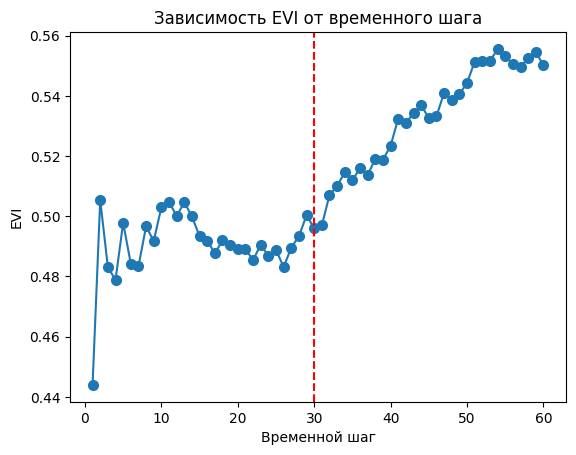

In [12]:
x_gr = np.linspace(1, 60, 60)
plt.plot(x_gr, y_gr, marker='o', markersize=7)
plt.xlabel('Временной шаг') #Хвостовые ингде
plt.ylabel('EVI') #Подпись для оси y
plt.axvline(x = 30, color = 'r', linestyle="--")
plt.title('Зависимость EVI от временного шага') #Название
plt.show()

In [10]:
print(y_gr)

[0.5513478903714173, 0.5517299136521192, 0.5515119449776407, 0.5555806804732963, 0.5531011058714359, 0.5506404431809422, 0.5494201854559932, 0.552720316323942, 0.5545132511955639, 0.5501791641136276]


In [ ]:
# y_gr (49_59) PA_PA_2_60/

# [0.5513478903714173, 0.5517299136521192, 0.5515119449776407, 0.5555806804732963, 0.5531011058714359, 
# 0.5506404431809422, 0.5494201854559932, 
# 0.552720316323942, 0.5545132511955639, 0.5501791641136276]

# y_gr (40_49) PA_PA_2_60/

# [0.5324379063744562, 0.5310757169618388, 0.5341502200528989, 0.5368283155840334, 0.5325856371737032, 0.5332012504470676, 
#  0.5410729763753341, 0.5385053864687865, 0.5405454458206904, 0.5442855201053014]

# y_gr (20_39) PA_PA_2_60/

# [0.48912296051930326, 0.4854103303845321, 
#  0.490567963799041, 0.486805725811033, 0.4888399899090885, 0.4831373891263322, 
#  0.4895799248239818, 0.49335416407280697, 0.5003413173473916, 0.49594136201047334, 
#  0.4969451851172728, 0.507038076305717, 0.5100548112039185, 0.5145577954964082, 0.5119931030815241, 
#  0.5159576177990441, 0.5137067043254113, 
#  0.5190714350509875, 0.51872927130273, 0.5234928597721851]


# y_gr (1_20) PA_PA_2_60/
# 0.4439634820309468, 0.5053884953500907, 0.48313207584862194, 0.4788011957004077, 0.49782897527278, 
# 0.48425973185954785, 0.4833135164139506, 0.4965995446759335, 0.4917584250788458, 0.5029401656134143, 
# 0.5048287548562218, 0.5000168008526069, 0.5046640695869176, 0.4999305635268403, 0.49335549417297475, 
# 0.4919347452898135, 0.4876633952774112, 0.49194504620432067, 0.49051539865270755, 0.48912296051930326]

<span style="color:orange">
    
## Graph analysis PA communities ##


лист максимумов матрицы ФЛ Хилл
[3.9929211589591613, 1.537068043531173, 1.2535582478358804, 1.1962130924594834, 0.47798065039378773, 2.267700126909901, 1.1707249676826057, 3.5526622093740023, 0.8969241277684048, 5.0335742848064395, 0.28157516921890835, 4.596634616862973, 10.392920644226177, 0.32621784357381484, 0.9943265789509739, 9.54104051276957, 0.26963331872313423, 0.5717219920149328, 2.6449804483351884]

лист максимумов матрицы ФЛ Mixed Moment
[2.2301742483782125, 21.208144007991766, 1.60123378221803, 3.2432438516862643, 0.8878690557027957, 5.005301383066537, 2.6904034476064718, 0.7975189277701307, 1.7107489169477657, 1.0358062810422504, 1.2779852855625058, 0.8722357296183573, 1.238176213578582, 3.257286516497264, 1.3189098618681643, 0.34197239552540215, 1.4377260582063536, 32.74796858143472, 1.0807691714192205]

In [6]:
blocks = 20
gen_name = '_PA_'
folder_name = "PA"

x_gr = list()
y_gr = list()
pr = []
for i in range(blocks):
    pr = []
    G_init = load_graph(i, folder_name, gen_name)
    pr = list((nx.pagerank(G_init)).values())
    x = pm.hill(pr)
    eye_val = (pm.eye_ball(x))[0]
    x_gr.append(i)
    y_gr.append(eye_val)
    # print(i, eye_val)

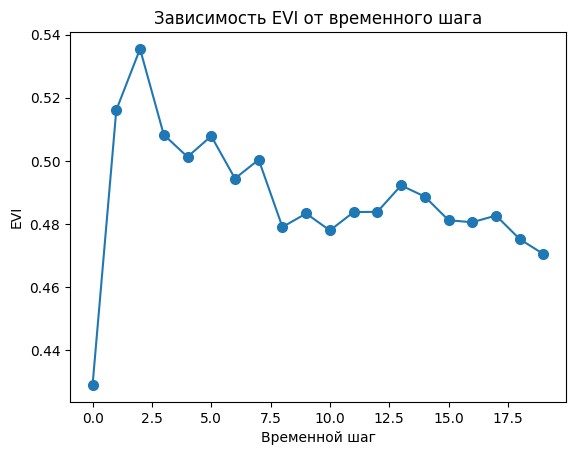

In [7]:
plt.plot(x_gr, y_gr, marker='o', markersize=7)
plt.xlabel('Временной шаг') #Хвостовые ингде
plt.ylabel('EVI') #Подпись для оси y
plt.title('Зависимость EVI от временного шага') #Название
plt.show()

In [26]:
G_PA_1 = load_graph(t = 10, folder_name = "PA", gen_name = '_PA_')
comm_pa = nx.community.louvain_communities(G_PA_1, resolution = 1)

In [27]:
graph_nd_analysis(G_PA_1, comm_pa)

graph analysis
Graph with 10992 nodes and 54819 edges

 
 
 degree analysis
      node  node_degree
2        3          543
6       10          386
244      9          355
422     14          321
4        6          295
0        1          241
423     15          213
1134    21          201
5        7          197
1        2          188
427     30          182
421     12          174
1857    29          158
425     23          150
246     17          144
245     13          142
1575    81          139
8       16          135
1135    32          132
435     55          128

 
 
 Comm len analysis
all communities: 14
0 1994
1 1961
2 939
3 864
4 802
5 787
6 773
7 756
8 567
9 539
 
 
 
 Comm separeted analysis

 0
    node  node_degree
3      7          197
8     29          158
12    33          128
48    92          123
2      5          121

 1
    node  node_degree
1      3          543
9     12          174
12    16          135
2      4          124
51    93           96

 2
    nod

In [28]:
matrix_fl_hill(G_PA_1, comm_pa)
print('\n')
matrix_fl_mm(G_PA_1, comm_pa)

[0.0, 0.6562548439589764, 1.6727776099742464, 0.05875348496795134, 1.4623917394476768e-05]
[0.6562548439589763, 0.0, 0.7058634588761491, 0.7164822078376806, 1.0357921912640906]
[1.6727776099742455, 0.7058634588761499, 0.0, 2.7111630402286635, 2.739969442239905]
[0.058753484967951415, 0.7164822078376798, 2.711163040228663, 0.0, 0.09062219343730851]
[1.462391739447874e-05, 1.0357921912640904, 2.739969442239906, 0.09062219343730867, 0.0]


[0.0, 0.009791744036604471, 1.6888763414793972, 0.12844012262409896, 0.1004026721547576]
[0.009791744036604565, 0.0, 4.323369572690708, 0.2747434521383019, 0.10393245468315702]
[1.6888763414793966, 4.323369572690706, 0.0, 2.6132955681486796, 1.9138051262686135]
[0.12844012262409896, 0.2747434521383018, 2.6132955681486787, 0.0, 0.49638525006233586]
[0.10040267215475764, 0.10393245468315684, 1.9138051262686144, 0.49638525006233586, 0.0]


In [46]:
list_pl_pr = []
for t in range(1, 20):
    G_PA_1_t = load_graph(t, folder_name = "PA", gen_name = '_PA_')
    comm_pa_t = nx.community.louvain_communities(G_PA_1_t, resolution = 1)
    bal = matrix_fl_hill_max(G_PA_1_t, comm_pa_t)
    list_pl_pr.append(bal)

3.9929211589591613
1.537068043531173
1.2535582478358804
1.1962130924594834
0.47798065039378773
2.267700126909901
1.1707249676826057
3.5526622093740023
0.8969241277684048
5.0335742848064395
0.28157516921890835
4.596634616862973
10.392920644226177
0.32621784357381484
0.9943265789509739
9.54104051276957
0.26963331872313423
0.5717219920149328
2.6449804483351884


In [47]:
print(list_pl_pr)

[3.9929211589591613, 1.537068043531173, 1.2535582478358804, 1.1962130924594834, 0.47798065039378773, 2.267700126909901, 1.1707249676826057, 3.5526622093740023, 0.8969241277684048, 5.0335742848064395, 0.28157516921890835, 4.596634616862973, 10.392920644226177, 0.32621784357381484, 0.9943265789509739, 9.54104051276957, 0.26963331872313423, 0.5717219920149328, 2.6449804483351884]


In [54]:
list_pl_pr = []
for t in range(1, 20):
    G_PA_1_t = load_graph(t, folder_name = "PA", gen_name = '_PA_')
    comm_pa_t = nx.community.louvain_communities(G_PA_1_t, resolution = 1)
    bal = matrix_fl_mm_max(G_PA_1_t, comm_pa_t)
    list_pl_pr.append(bal)

2.2301742483782125
21.208144007991766
1.60123378221803
3.2432438516862643
0.8878690557027957
5.005301383066537
2.6904034476064718
0.7975189277701307
1.7107489169477657
1.0358062810422504
1.2779852855625058
0.8722357296183573
1.238176213578582
3.257286516497264
1.3189098618681643
0.34197239552540215
1.4377260582063536
32.74796858143472
1.0807691714192205


In [55]:
print(list_pl_pr)

[2.2301742483782125, 21.208144007991766, 1.60123378221803, 3.2432438516862643, 0.8878690557027957, 5.005301383066537, 2.6904034476064718, 0.7975189277701307, 1.7107489169477657, 1.0358062810422504, 1.2779852855625058, 0.8722357296183573, 1.238176213578582, 3.257286516497264, 1.3189098618681643, 0.34197239552540215, 1.4377260582063536, 32.74796858143472, 1.0807691714192205]


<span style="color:orange">
    
## U_x ##

In [69]:
gen_name = '_CA_'
folder_name = "CA_PA"
i = 10
G_init = load_graph(i, folder_name, gen_name)
X = list((nx.pagerank(G_init)).values())
Xord = np.sort(X, axis=0)

MaxN = len(X)


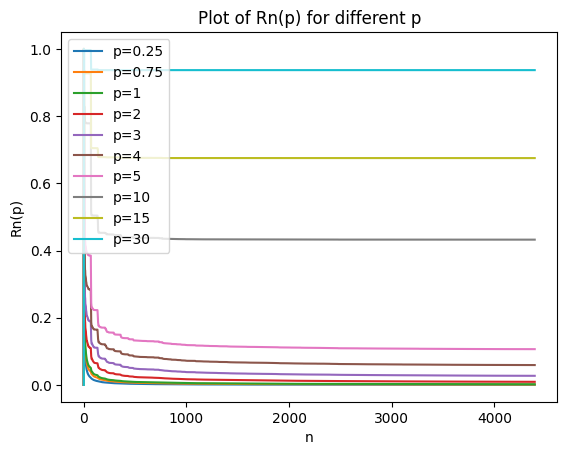

In [71]:
arrP = [0.25, 0.75,1, 2, 3, 4, 5, 10, 15, 30] #задание диапозона на p
MaxP = len(arrP)
n = 0 
p = 0 
modX = np.zeros((MaxN, MaxP))
Rn = np.zeros((MaxN, MaxP))


for p in range(0, MaxP):
    modX[:, p] = np.power(np.abs(X), arrP[p])
    Mn = 0
    Sn = 0
    for n in range(1, MaxN): 
        Mn = np.max(modX[0:n, p])
        Sn = np.sum(modX[0:n, p])
        Rn[n][p] = Mn / Sn


pltN = np.arange(1, MaxN+1, 1)
legend = []

for p in range(0, MaxP):
    plt.plot(pltN, Rn[:, p])
    legend.append(f"p={arrP[p]}")
    
plt.legend(legend, loc="upper left")
plt.xlabel('n') #Подпись для оси х
plt.ylabel('Rn(p)') #Подпись для оси y
plt.title('Plot of Rn(p) for different p') #Название
plt.show()

NameError: name 'my_path' is not defined

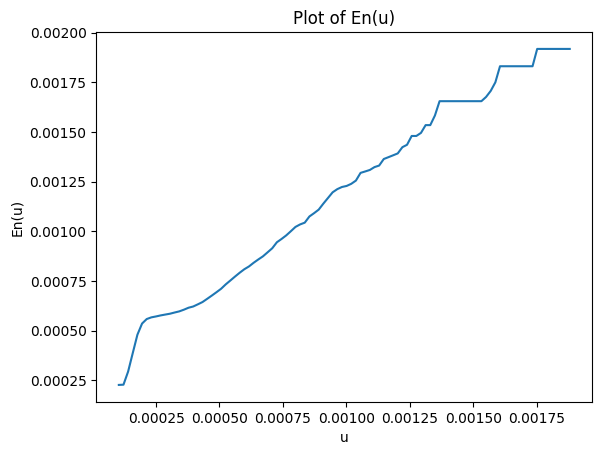

In [80]:
U = np.linspace(np.min(X), np.max(X), 100)
U = U[:-2]
En = np.zeros(len(U))
SumUp = 0
SumDn = 0

for u in range (0, len(U)):
    SumUp = 0
    SumDn = 0
    for i in range (0, len(X)):
        if (X[i] > U[u]):
            SumUp += X[i]
            SumDn += 1
    En[u] = SumUp / SumDn


pltN = np.arange(1, MaxN+1, 1)
legend = []

plt.plot(U, En)
plt.xlabel('u') #Подпись для оси х
plt.ylabel('En(u)') #Подпись для оси y
plt.title('Plot of En(u)') #Название
plt.savefig(my_path + '/Exercise4.png')
plt.show()


In [ ]:
med = []
for i in range(30):
    med.append(np.median(pr[i]))

plt.plot(x_gr, med, marker='o', markersize=7)
plt.xlabel('Временной блок') #Хвостовые ингде
plt.ylabel('Медиана данных в блоке') #Подпись для оси y
plt.title('Медиана данных в блоке от времени') #Название
plt.show()

In [ ]:
"""
Тесты Филлипса Лоретана для разных блоков.
"""

group_1 = []
for i in range(0, 10):
    for j in range(0, 10):
        # print(i, j, phillips_loretan(pr[i], pr[j]))
        group_1.append(phillips_loretan(pr[i], pr[j]))

group_1_2 = []
# print('\n')
for i in range(0, 10):
    for j in range(10, 20):
        # print(i, j, phillips_loretan(pr[i], pr[j]))
        group_1_2.append(phillips_loretan(pr[i], pr[j]))

group_2 = []
# print('\n')
for i in range(10, 20):
    for j in range(10, 20):
        # print(i, j, phillips_loretan(pr[i], pr[j]))
        group_2.append(phillips_loretan(pr[i], pr[j]))

print('group_1 \n', min(group_1), max(group_1), '\n')
print('group_2 \n', min(group_2), max(group_2), '\n')
print('group_1_2 \n', min(group_1_2), max(group_1_2), '\n')

In [ ]:
phillips_loretan(pr[14], pr[15])

<span style="color:orange">
    
## Graph analysis ABG ##

In [12]:
gen_name = '_ABG'
folder_name = "ABG_graph_2"
t = 3

G_ABG_1 = load_graph_di(t, folder_name, gen_name)

In [13]:
print(len(G_ABG_1.nodes()))

6777


In [16]:
print('graph analysis')
print(G_ABG_1)

# G_ABG_und = G_ABG_1.to_undirected()

comm = nx.community.louvain_communities(G_ABG_1, resolution = 1)
comm = sorted(comm, key=len, reverse=True)


print('\n \n \n degree analysis')
in_data = pd.DataFrame(data = G_ABG_1.in_degree(), columns=['node', 'node_degree'])
print(in_data.sort_values(by = 'node_degree', ascending = False)[0:20])


print('\n \n \n Comm len analysis')
print('all communities:', len(comm))
for i in range(10):
    # if (len(comm[i]) > 0.05 * len(G_ABG_1.nodes())):
    #     print(i, len(comm[i]))
    print(i, len(comm[i]))
# print(comm[1])

print(' \n \n \n Comm separeted analysis')
in_data = pd.DataFrame(data = G_ABG_1.in_degree(), columns=['node', 'node_degree'])
for i in range(5):
    ser_comm = pd.DataFrame(data=list(comm[i]), columns=['node'])
    print('\n', i)
    print(pd.merge(ser_comm, in_data).sort_values(by = 'node_degree', ascending = False)[0:5])

graph analysis
DiGraph with 6777 nodes and 13357 edges

 
 
 degree analysis
    node  node_degree
7     16          444
5     45          427
23    54          422
0      1          329
2      3          311
4     42          289
3     10          241
1      2          135
17    79          117
26    66           95
21   139           93
18   309           92
53   217           87
46    61           74
35    72           69
14    96           65
47   305           63
39   165           58
32   414           55
22   426           51

 
 
 Comm len analysis
all communities: 1990
0 167
1 166
2 165
3 144
4 120
5 109
6 94
7 67
8 65
9 46
 
 
 
 Comm separeted analysis

 0
     node  node_degree
19     54          422
16    554           12
131   399           11
38   1130           10
105  2890           10

 1
     node  node_degree
16     45          427
55    688           16
119  1381           13
5    7182            9
107  3919            8

 2
     node  node_degree
4      16        

<span style="color:orange">
    
## Graph analysis CA communities ##

In [33]:
gen_name = '_CA_'
folder_name = "CA_PA"
t = 19

G_CA_1 = load_graph(t, folder_name, gen_name)
comm = nx.community.louvain_communities(G_CA_1, resolution = 1)

In [35]:
graph_nd_analysis(G_CA_1, comm)

graph analysis
Graph with 7983 nodes and 39743 edges

 
 
 degree analysis
     node  node_degree
3       4          120
89      6          109
2       3          107
179    18          103
90      8           97
1       2           93
88      5           91
91     19           88
0       1           87
5      20           87
178    17           86
177    16           82
175     7           81
176    11           80
92     21           79
7      24           78
286   173           78
458    28           78
182    32           77
9      36           76

 
 
 Comm len analysis
all communities: 19
0 1559
1 893
2 888
3 697
4 574
5 543
6 404
7 364
8 338
9 337
 
 
 
 Comm separeted analysis

 0
    node  node_degree
2      4          120
4      6          109
1      3          107
16    18          103
6      8           97

 1
     node  node_degree
55    158           69
166   479           57
141   391           56
77    211           54
163   472           54

 2
     node  node_degree
0

In [38]:
matrix_fl_hill(G_CA_1, comm)
print('\n')
matrix_fl_mm(G_CA_1, comm)

[0.0, 0.0004858905570176128, 0.043144215898165035, 0.030973335345655353, 0.1286007286142218]
[0.00048589055701762793, 0.0, 0.0609022719994795, 0.02702081851316947, 0.16383546247217862]
[0.04314421589816496, 0.060902271999479604, 0.0, 0.21276314887713238, 0.030898219123431367]
[0.03097333534565536, 0.027020818513169523, 0.21276314887713216, 0.0, 0.392463702933291]
[0.12860072861422178, 0.1638354624721784, 0.030898219123431395, 0.39246370293329075, 0.0]


[0.0, 158.82836047511654, 100.06445961994869, 46.885449918741486, 96.50087369779907]
[158.82836047511654, 0.0, 45.49427061302913, 111.78823840442296, 21.926707973865888]
[100.06445961994869, 45.49427061302912, 0.0, 61.966313593197945, 3.947407228968819]
[46.8854499187415, 111.78823840442297, 61.966313593197974, 0.0, 49.47173221637388]
[96.50087369779904, 21.926707973865884, 3.947407228968818, 49.471732216373866, 0.0]


<span style="color:orange">
    
## Рассуждения над mixed moment ##

In [9]:
def plot_est_bs(input, name='Hill', print=False):
    val_mean = input[0]
    val_dn = input[1]
    val_up = input[2] 
    legend = []
    n = len(val_mean)

    k_find = pm.eye_ball(val_mean)
    print(k_find)
    y = val_mean[k_find]
    x = np.arange(val_up.size)
    
    plt.plot(val_mean)    
    legend.append(f"{name}'s plot")
    
    plt.axhline(y, color = 'r', linestyle="--")
    legend.append(f"Интервал стабильности")
    print(f"{y} Интервал стабильности")
    plt.plot(x, val_up, 'k--')
    plt.plot(x, val_dn, 'k--')

    plt.ylim(np.min(val_mean[int(n/20):int(0.95*n)]), np.max(val_mean[int(n/20):int(0.95*n)]))
    
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel(name) #Подпись для оси y
    plt.legend(legend, loc="upper left")
    plt.title(f"{name}'s estimator с доверительным интервалом") #Название
    if print:
        plt.savefig(my_path + "/Text" + '/Imagines' + '/' + name)
    
    plt.show()

In [10]:
print(pm.eye_ball(pm.mixed_moment(pr_comm(G_CA_1, comm[7])))[0])

0.23894131816185302


In [11]:
print(pm.eye_ball(pm.hill(pr_comm(G_CA_1, comm[0]))))
print(pm.eye_ball(pm.mixed_moment(pr_comm(G_CA_1, comm[0]))))

(0.25446181800272694, 30)
(0.12446170366979888, 67)


In [12]:
GammaH = pm.hill(pr_comm(G_CA_1, comm[0]))
num_gamma = pm.mixed_moment(pr_comm(G_CA_1, comm[0]))

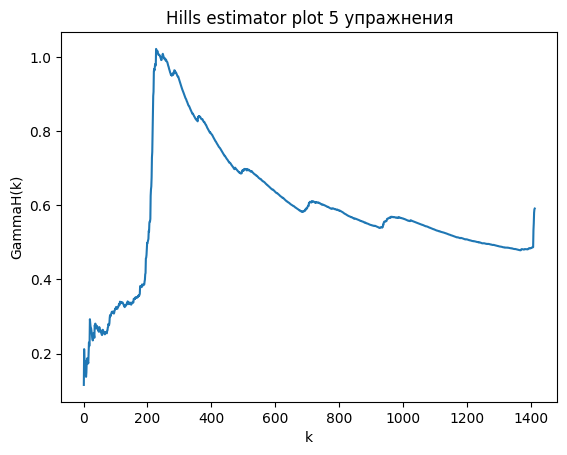

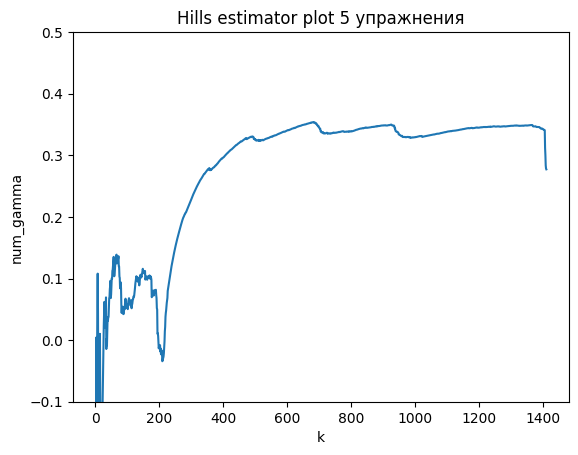

In [13]:
GammaH = pm.hill(pr_comm(G_CA_1, comm[0]))
num_gamma = pm.mixed_moment(pr_comm(G_CA_1, comm[0]))

MaxN = len(GammaH) 
MaxK = MaxN

PltN = np.arange(1, MaxN+1, 1)
PltP = np.arange(0, round(MaxK/4), 1)
legend = []

plt.plot(PltN, GammaH)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('GammaH(k)') #Подпись для оси y
plt.title('Hills estimator plot 5 упражнения') #Название
plt.show()


MaxN = len(num_gamma) 
MaxK = MaxN

PltN = np.arange(1, MaxN+1, 1)
PltP = np.arange(0, round(MaxK/4), 1)
legend = []

plt.plot(PltN, num_gamma)
plt.xlabel('k') #Подпись для оси х
plt.ylabel('num_gamma') #Подпись для оси y
plt.title('Hills estimator plot 5 упражнения') #Название
plt.ylim(-0.1, 0.5)
plt.show()


<span style="color:orange">
    
## Old code ##

In [14]:
# for t in range(0, blocks//2):
#     G_init = gen_graph_CA(G_init, num_nodes, num_neigh)
#     pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]
#     (nx.to_pandas_edgelist(G_init)).to_csv(my_path + "/Data_postproc" + "/Big_graph" + "/CA_PA_" \
#                                                + str(t) + "_nodes" + ".csv", index=False)


# for t in range(0, blocks//2):
#     my_path = os.path.abspath("") + "/.."
#     CA_graph_df = pd.read_csv(my_path + "/Data_postproc" + "/Big_graph" + "/CA_PA_" \
#                                                + str(t) + "_nodes" + ".csv")
#     G_init = nx.from_pandas_edgelist(CA_graph_df)
#     pr[t] = list((nx.pagerank(G_init)).values())[-num_nodes:-1]

In [15]:
# for i in range(len(edges_ca['source'])):
#     print(i, edges_ca[edges_ca['source'] == i].size)
# print(edges_ca[edges_ca['source'] == 1])

In [11]:
# data = {
#     'Source': [1, 2],
#     'Target': [2, 1],
#     'Node_degree': [1, 1]
# }

# row_labels = [1, 2]

# PA_graph = pd.DataFrame(data=data, index=row_labels)

# flg_PA = 0

# l = []
# if(flg_PA == 1):
#     for i in tqdm(range(3, 10000)):
#         k = (random.choices(PA_graph['Source'].values, weights=PA_graph['Node_degree'].values))[0]
#         if (i == 3):
#             l = [PA_graph['Source'].values, PA_graph['Node_degree'].values]
#         # print(k)
#         PA_graph.loc[i] = [i, k, 1]
#         PA_graph['Node_degree'][k] += 1

# print(l)

In [12]:
# генерация графа CA старая версия
# 
# if(flg_CA == 1):
#     for i in tqdm(range(4, num_nodes_ca)):
#         local_calst = list(nx.clustering(G_ca).values())
#         for j in range(len(local_calst)):
#             local_calst[j] += 0.001
#         k = []
#         for i1 in range(num_neigh):
#             k.append((random.choices(list(nx.clustering(G_ca).keys()), weights=local_calst))[0])
#         for i1 in range(num_neigh):
#             G_ca.add_edge(k[i1], i)


In [13]:
# def gen_graph_ABG(G_input: nx.DiGraph, num_iterations: int, alpha: float, beta: float, \
#                   d_in: float, d_out: float) -> nx.DiGraph:
#     """
#     Функция генерации вершин графа методом альфа, бетта, гамма присоединения.
#     Используются библиотеки tqdm, networkx.
#     gamma = 1 - (alpha + beta).
    
#     Input:
#         G_input - изначальный ориентированный граф к которому присоединяются новые вершины.
#         num_iterations - количество итераций алгоритма.
#         alpha - float вероятность.
#         beta - float вероятность. 
#         d_in - float.
#         d_out - float.
        
#     Output:
#         Изначальный граф к которому присоеденены вершины.
#     """
#     assert ((alpha + beta) <= 1)

#     i_start = len(list(G_input.nodes))
#     gamma = 1 - alpha - beta
#     print(alpha, beta, gamma, G_input)

#     for i in tqdm(range(0, num_iterations + 1)):
#         iter_prob = random.choices([1, 2, 3], weights=[alpha, beta, gamma])[0]
        
#         I_n1 = list(dict(G_input.in_degree()).values())
#         O_n1 = list(dict(G_input.out_degree()).values())
        
#         N_I = list(dict(G_input.in_degree()).keys())
#         N_O = list(dict(G_input.out_degree()).keys())
        
#         N = len(I_n1)
#         n = sum(list(dict(G_input.in_degree()).values()))
#         u = list(G_input.nodes)[-1] + 1
#         num = len(I_n1) + 1

#         assert (N_I == N_O)
        
#         if (iter_prob == 1):
#             denominator = n - 1 + d_in * N
#             local_eq = []
#             for j in range(len(I_n1)):
#                 local_eq.append((I_n1[j] + d_in) / denominator)
#             w = (random.choices(N_I, weights=local_eq))[0]
#             G_input.add_edge(num, w)

#         if (iter_prob == 2):
#             denominator_1 = n - 1 + d_in * N
#             denominator_2 = n - 1 + d_out * N
#             local_eq = []
#             for j in range(len(I_n1)):
#                 local_eq.append(((I_n1[j] + d_in) / denominator_1) * ((O_n1[j] + d_out) / denominator_2))
#             w = (random.choices(N_I, weights=local_eq))[0]
#             u = (random.choices(N_I, weights=local_eq))[0]
#             G_input.add_edge(u, w)
        
#         if (iter_prob == 3):
#             denominator = n - 1 + d_out * N
#             local_eq = []
#             for j in range(len(O_n1)):
#                 local_eq.append((O_n1[j] + d_out) / denominator)
#             w = (random.choices(N_O, weights=local_eq))[0]
#             G_input.add_edge(w, num)

#     return G_input